<a href="https://www.kaggle.com/code/akankshagarg1105/online-shopping-analysis?scriptVersionId=216059148" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-shopping-dataset/file.csv
/kaggle/input/online-shopping-dataset/file.xlsx


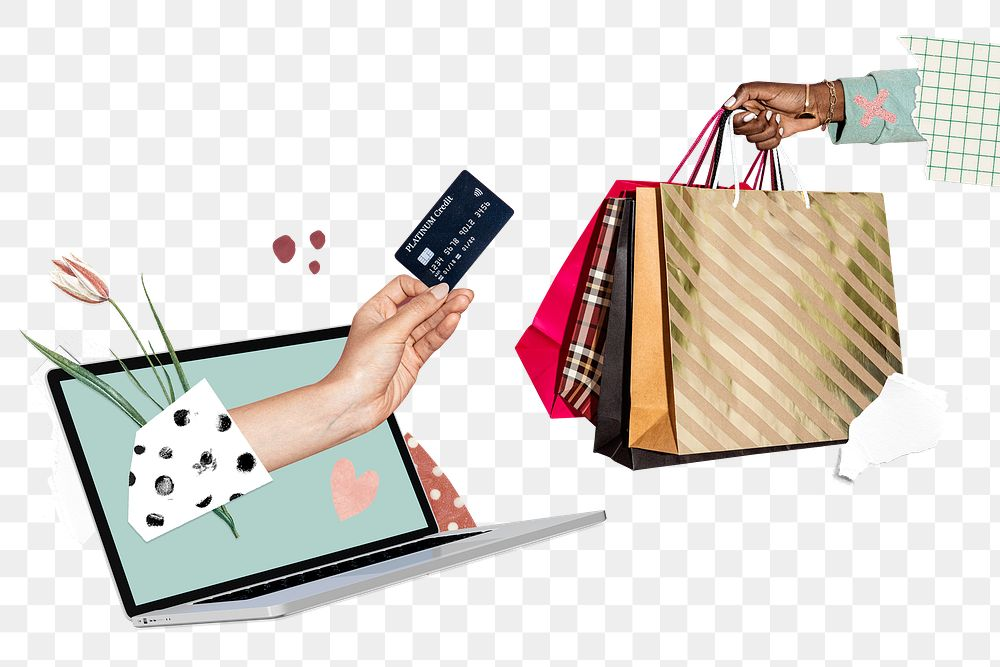

**Hey everyone! In this project we will delve into the realm of online shopping data, aiming to uncover valuable insights that can inform strategic decision-making. By harnessing the power of exploratory data analysis (EDA) techniques, we can visualize and interpret various facets of the dataset. From monthly sales trends and customer segmentation to product analysis and coupon usage patterns, this project seeks to provide a comprehensive understanding of the underlying patterns and trends within the online shopping domain. Through data analysis, we aim to extract actionable insights that can contribute to enhancing the overall customer experience and optimizing business strategies. Let the exploration begin!**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset** 

In [3]:
df_shopping = pd.read_csv("/kaggle/input/online-shopping-dataset/file.csv")
print(df_shopping)


       Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
0               0     17850.0      M  Chicago           12.0         16679.0   
1               1     17850.0      M  Chicago           12.0         16680.0   
2               2     17850.0      M  Chicago           12.0         16696.0   
3               3     17850.0      M  Chicago           12.0         16699.0   
4               4     17850.0      M  Chicago           12.0         16700.0   
...           ...         ...    ...      ...            ...             ...   
52950       52950         NaN    NaN      NaN            NaN             NaN   
52951       52951         NaN    NaN      NaN            NaN             NaN   
52952       52952         NaN    NaN      NaN            NaN             NaN   
52953       52953         NaN    NaN      NaN            NaN             NaN   
52954       52954         NaN    NaN      NaN            NaN             NaN   

      Transaction_Date     Product_SKU 

In [4]:
print(df_shopping.head())

   Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
0           0     17850.0      M  Chicago           12.0         16679.0   
1           1     17850.0      M  Chicago           12.0         16680.0   
2           2     17850.0      M  Chicago           12.0         16696.0   
3           3     17850.0      M  Chicago           12.0         16699.0   
4           4     17850.0      M  Chicago           12.0         16700.0   

  Transaction_Date     Product_SKU  \
0       2019-01-01  GGOENEBJ079499   
1       2019-01-01  GGOENEBJ079499   
2       2019-01-01  GGOENEBQ078999   
3       2019-01-01  GGOENEBQ079099   
4       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  ...  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
2             Nest Cam Outdoor Security Camera - USA         Nest-USA  ...   
3 

In [5]:
print(df_shopping.info())   #printing the basic info of our data 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [6]:
print(df_shopping.describe())      #Summary of data 

         Unnamed: 0   CustomerID  Tenure_Months  Transaction_ID      Quantity  \
count  52955.000000  52924.00000   52924.000000    52924.000000  52924.000000   
mean   26477.000000  15346.70981      26.127995    32409.825675      4.497638   
std    15286.936089   1766.55602      13.478285     8648.668977     20.104711   
min        0.000000  12346.00000       2.000000    16679.000000      1.000000   
25%    13238.500000  13869.00000      15.000000    25384.000000      1.000000   
50%    26477.000000  15311.00000      27.000000    32625.500000      1.000000   
75%    39715.500000  16996.25000      37.000000    39126.250000      2.000000   
max    52954.000000  18283.00000      50.000000    48497.000000    900.000000   

          Avg_Price  Delivery_Charges           GST  Offline_Spend  \
count  52924.000000      52924.000000  52924.000000   52924.000000   
mean      52.237646         10.517630      0.137462    2830.914141   
std       64.006882         19.475613      0.045825     936.

In [7]:
print(df_shopping.isnull().sum())   #to check if there are any null values in our dataset

Unnamed: 0               0
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64


In [8]:
# Display unique values in categorical columns
categorical_columns = df_shopping.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nUnique values in {column}:")
    print(df_shopping[column].unique())


Unique values in Gender:
['M' 'F' nan]

Unique values in Location:
['Chicago' 'California' 'New York' 'New Jersey' 'Washington DC' nan]

Unique values in Transaction_Date:
['2019-01-01' '2019-01-03' '2019-01-04' '2019-01-16' '2019-01-17'
 '2019-01-18' '2019-01-21' '2019-01-22' '2019-01-24' '2019-01-26'
 '2019-01-02' '2019-01-30' '2019-01-25' '2019-01-05' '2019-01-06'
 '2019-01-07' '2019-01-08' '2019-01-20' '2019-01-09' '2019-01-10'
 '2019-01-11' '2019-01-28' '2019-01-12' '2019-01-13' '2019-01-14'
 '2019-01-15' '2019-01-19' '2019-01-29' '2019-01-23' '2019-01-27'
 '2019-01-31' '2019-12-18' '2019-12-07' '2019-12-08' '2019-12-19'
 '2019-12-26' '2019-12-04' '2019-12-05' '2019-12-10' '2019-12-20'
 '2019-12-15' '2019-12-21' '2019-12-28' '2019-12-14' '2019-12-11'
 '2019-12-12' '2019-12-13' '2019-12-06' '2019-12-31' '2019-12-16'
 '2019-12-17' '2019-12-22' '2019-12-02' '2019-12-09' '2019-12-27'
 '2019-12-24' '2019-12-01' '2019-12-29' '2019-12-30' '2019-12-03'
 '2019-12-23' '2019-12-25' '2019-08

**To know Customer Purchase Patterns**

In [9]:
purchase_patterns = df_shopping.groupby('CustomerID')['Product_Category'].nunique()
print(purchase_patterns)

CustomerID
12346.0     2
12347.0    10
12348.0     6
12350.0     4
12356.0     7
           ..
18259.0     4
18260.0    11
18269.0     2
18277.0     1
18283.0    13
Name: Product_Category, Length: 1468, dtype: int64


**Correlation Matrix**

In [10]:
# Exclude non-numeric columns from correlation matrix
numeric_columns = df_shopping.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_shopping[numeric_columns].corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  Unnamed: 0  CustomerID  Tenure_Months  Transaction_ID  \
Unnamed: 0          1.000000   -0.032982      -0.013787        0.043079   
CustomerID         -0.032982    1.000000      -0.024431       -0.091476   
Tenure_Months      -0.013787   -0.024431       1.000000        0.022163   
Transaction_ID      0.043079   -0.091476       0.022163        1.000000   
Quantity            0.009366   -0.008174       0.006867       -0.028456   
Avg_Price          -0.089781    0.003685      -0.000785        0.126397   
Delivery_Charges   -0.009051   -0.006316      -0.014848       -0.085840   
GST                 0.040725    0.000468      -0.001239       -0.098705   
Offline_Spend      -0.209807   -0.004611       0.040070        0.199053   
Online_Spend       -0.101547   -0.017872       0.025865        0.165261   
Month               0.058658   -0.090332       0.019378        0.995517   
Discount_pct       -0.433815    0.000337       0.029703        0.241759   

   

In [11]:
# Statistical summary for specific columns 
selected_columns = ['Quantity', 'Avg_Price']
statistical_summary = df_shopping[selected_columns].describe()
print(statistical_summary)

           Quantity     Avg_Price
count  52924.000000  52924.000000
mean       4.497638     52.237646
std       20.104711     64.006882
min        1.000000      0.390000
25%        1.000000      5.700000
50%        1.000000     16.990000
75%        2.000000    102.130000
max      900.000000    355.740000


In [12]:
sales_by_category = df_shopping.groupby('Product_Category')['Quantity'].sum()
print(sales_by_category)


Product_Category
Accessories              1097.0
Android                    45.0
Apparel                 32438.0
Backpacks                 113.0
Bags                    15273.0
Bottles                  2090.0
Drinkware               30501.0
Fun                       834.0
Gift Cards                206.0
Google                    575.0
Headgear                 3533.0
Housewares               2484.0
Lifestyle               24881.0
More Bags                 144.0
Nest                     2837.0
Nest-Canada               469.0
Nest-USA                21430.0
Notebooks                   0.0
Notebooks & Journals     9556.0
Office                  88383.0
Waze                     1144.0
Name: Quantity, dtype: float64


**Monthly Purchase trends**

In [13]:
# Convert 'Transaction_Date' to datetime format
df_shopping['Transaction_Date'] = pd.to_datetime(df_shopping['Transaction_Date'])

# Extract month from 'Transaction_Date' and analyze monthly purchase trends
df_shopping['month'] = df_shopping['Transaction_Date'].dt.month
monthly_purchase_trends = df_shopping.groupby('month')['Online_Spend'].mean()
print("\nMonthly Purchase Trends:")
print(monthly_purchase_trends)



Monthly Purchase Trends:
month
1.0     1891.921036
2.0     1936.704035
3.0     1602.687600
4.0     1975.161959
5.0     1656.610022
6.0     1773.528197
7.0     1724.611390
8.0     1878.249393
9.0     1719.012673
10.0    1876.506338
11.0    2255.692929
12.0    2497.645937
Name: Online_Spend, dtype: float64


In [14]:
print(df_shopping.columns)

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct', 'month'],
      dtype='object')


**Customer loyalty analysis** 

In [15]:
# Calculate customer loyalty based on repeat purchases
loyalty_analysis = df_shopping.groupby('CustomerID')['Online_Spend'].agg(['count', 'sum'])
loyalty_analysis['average_purchase'] = loyalty_analysis['sum'] / loyalty_analysis['count']
print(loyalty_analysis)

            count        sum  average_purchase
CustomerID                                    
12346.0         2    5093.34       2546.670000
12347.0        60  127339.54       2122.325667
12348.0        23   47477.33       2064.231739
12350.0        17   58383.27       3434.310000
12356.0        36   91680.12       2546.670000
...           ...        ...               ...
18259.0         7   16398.76       2342.680000
18260.0        40   95583.17       2389.579250
18269.0         8   17418.35       2177.293750
18277.0         1    1153.81       1153.810000
18283.0       102  243910.11       2391.275588

[1468 rows x 3 columns]


**Segmenting Customers by Purchase Frequency**

In [16]:
# Calculate customer purchase frequency
purchase_frequency = df_shopping['CustomerID'].value_counts()

# Define customer segments based on purchase frequency
segments = pd.cut(purchase_frequency, bins=[0, 5, 10, np.inf], labels=['Low', 'Medium', 'High'])

# Add the customer segment information to the DataFrame
df_shopping['customer_segment'] = df_shopping['CustomerID'].map(segments)

# Display the distribution of customer segments
print("\nCustomer Segmentation:")
print(df_shopping['customer_segment'].value_counts())


Customer Segmentation:
customer_segment
High      50904
Medium     1425
Low         595
Name: count, dtype: int64


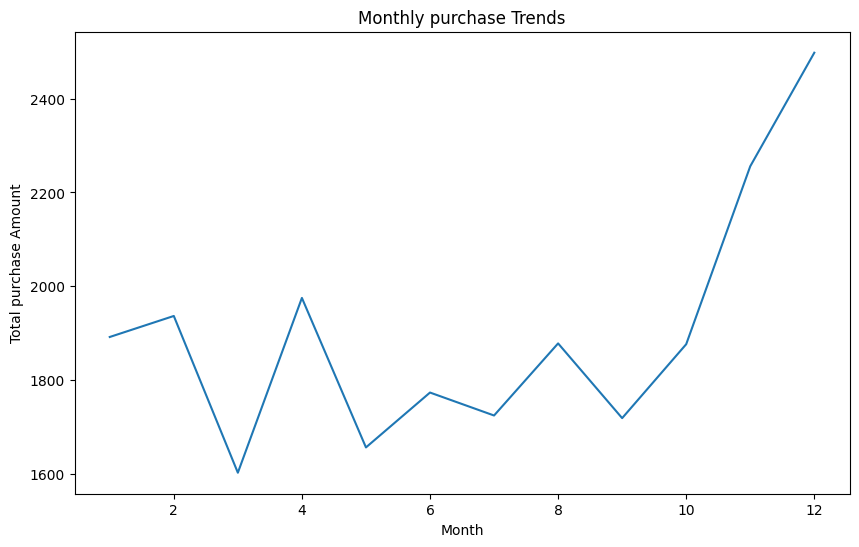

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_purchase_trends.index, y=monthly_purchase_trends.values)
plt.title('Monthly purchase Trends')
plt.xlabel('Month')
plt.ylabel('Total purchase Amount')
plt.show()

**Sales distribution by product category**

/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


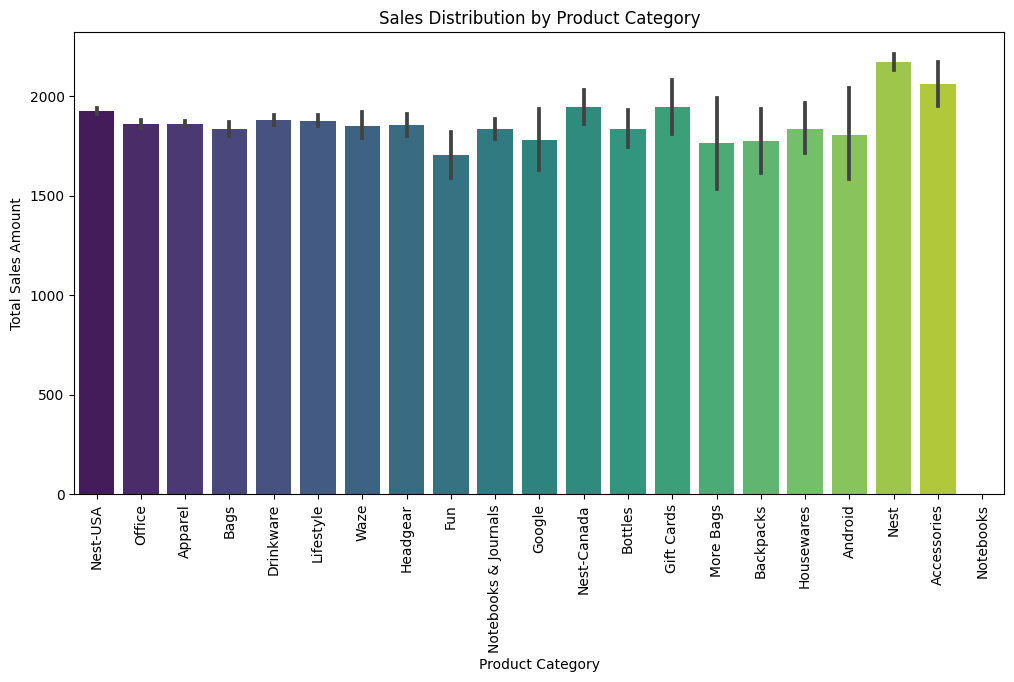

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Category', y='Online_Spend', data=df_shopping, palette='viridis')
plt.title('Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.show()

**Customer segmentation distribution**

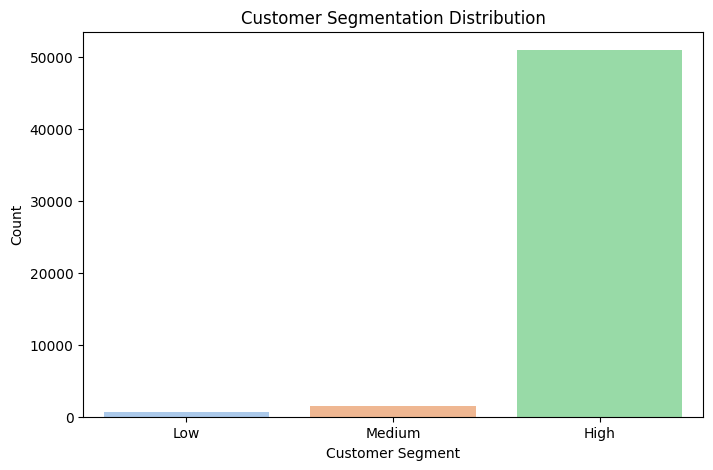

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='customer_segment', data=df_shopping, palette='pastel')
plt.title('Customer Segmentation Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

**Product Analysis**    (Product Quantity vs. Avg. Price)

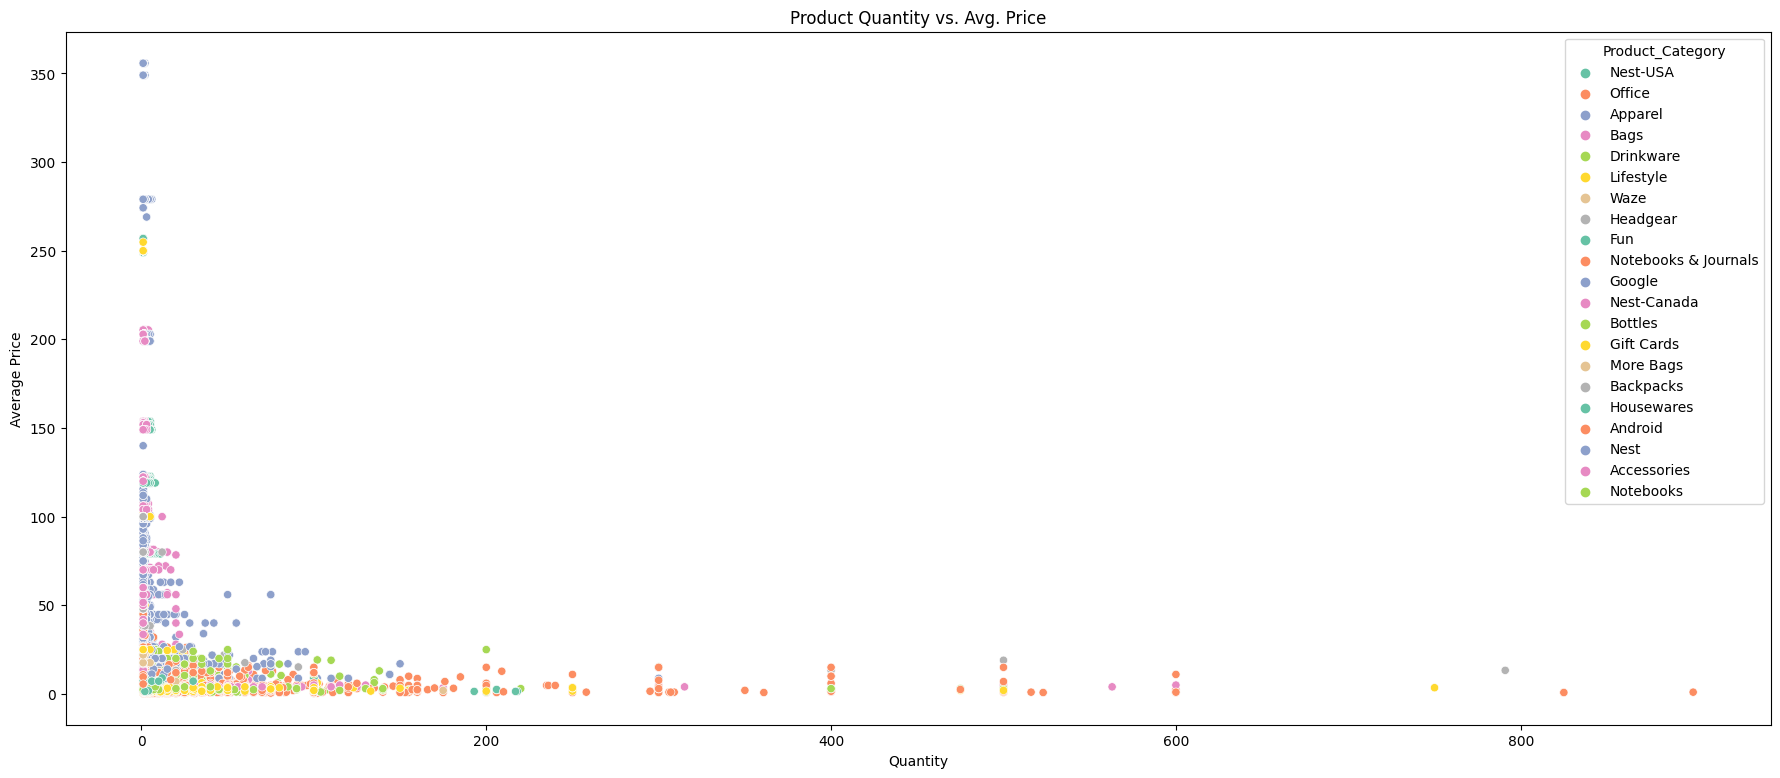

In [20]:
plt.figure(figsize=(22, 9))
sns.scatterplot(x='Quantity', y='Avg_Price', data=df_shopping, hue='Product_Category', palette='Set2')
plt.title('Product Quantity vs. Avg. Price')
plt.xlabel('Quantity')
plt.ylabel('Average Price')
plt.show()

**Weekly sales trend**

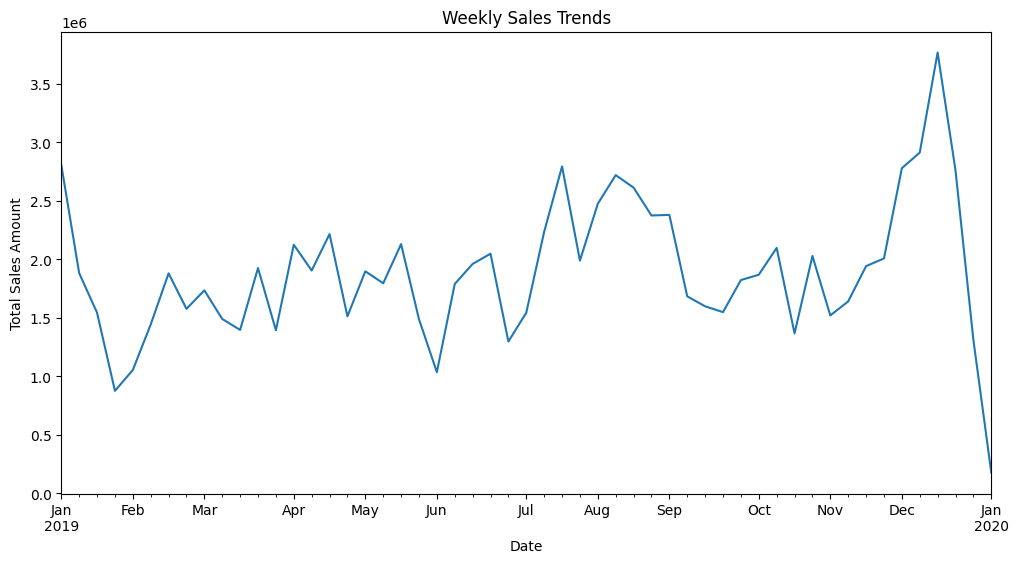

In [21]:
weekly_sales = df_shopping.set_index('Transaction_Date')['Online_Spend'].resample('W').sum()
plt.figure(figsize=(12, 6))
weekly_sales.plot()
plt.title('Weekly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()

**Product category distribution**

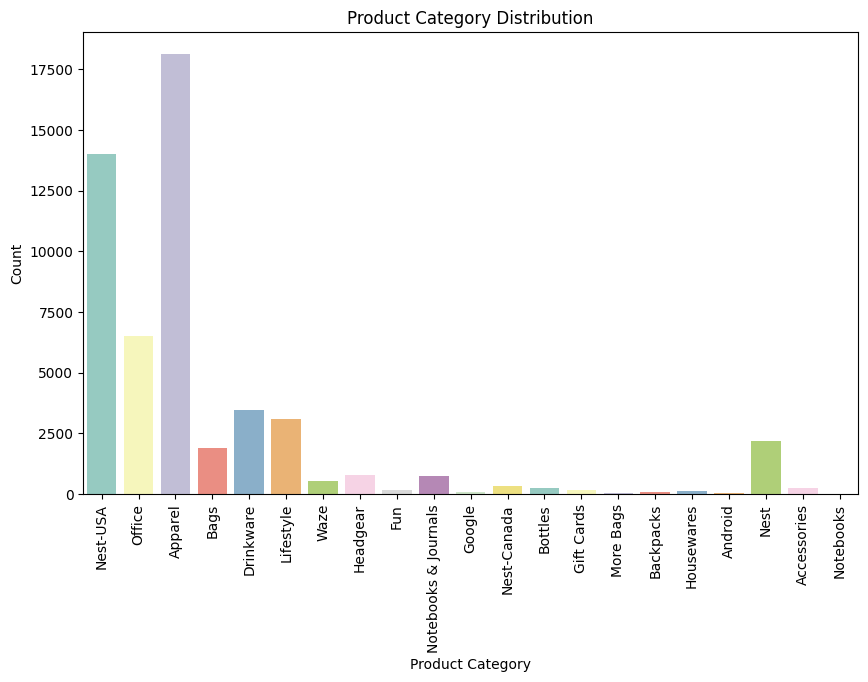

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Category', data=df_shopping, palette='Set3')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Box plot of online spend by category** 

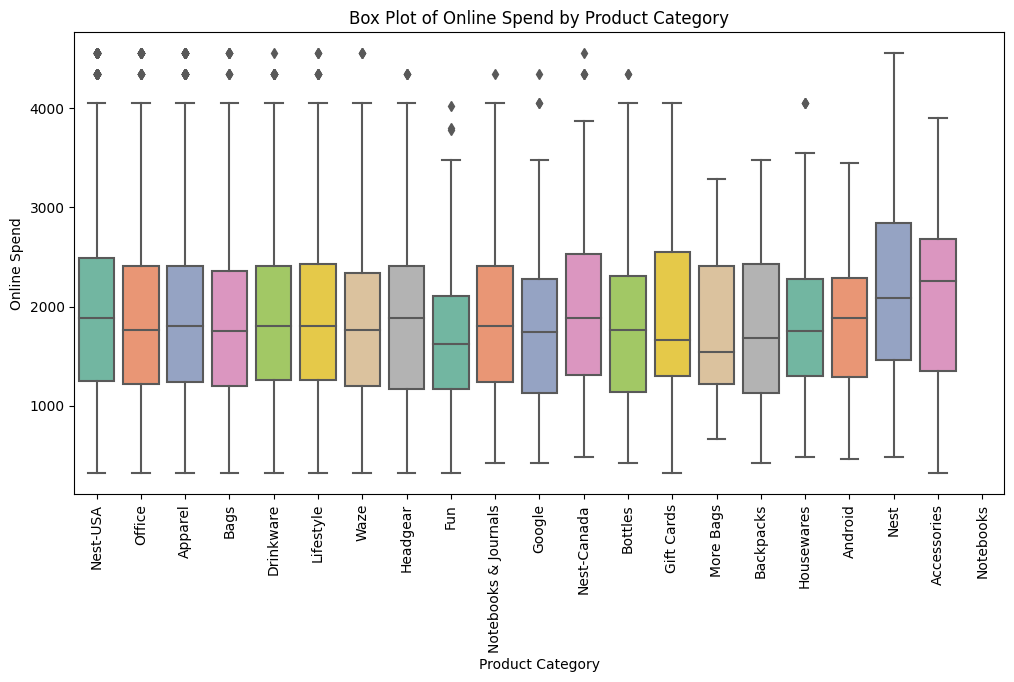

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product_Category', y='Online_Spend', data=df_shopping, palette='Set2')
plt.title('Box Plot of Online Spend by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Online Spend')
plt.xticks(rotation=90)
plt.show()

**Coupon usage analysis**

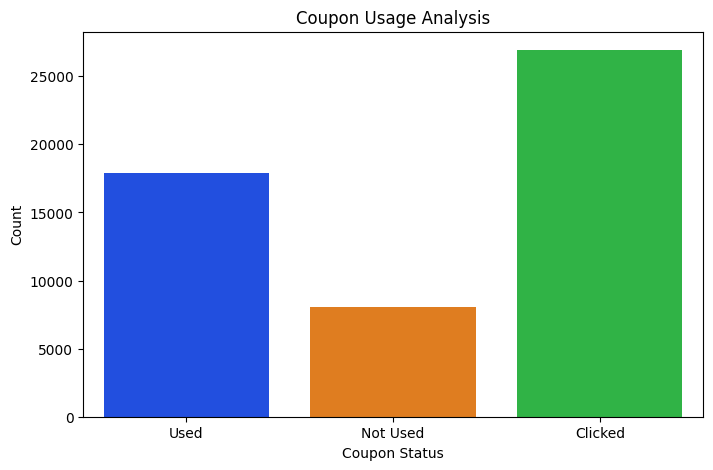

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Coupon_Status', data=df_shopping, palette='bright')
plt.title('Coupon Usage Analysis')
plt.xlabel('Coupon Status')
plt.ylabel('Count')
plt.show()

**SUMMARY**

**In this notebook, we discovered and explored online shopping dataset** 

**Specifically, we learned:**

**How to load data from kaggle using pandas and dataframe concept**.

**How to explore and visualize data using Pandas, Matplotlib, and Seaborn.**

**How to plot different line and bar charts.**

**How to analyze Weekly and monthly sales trend.**

**How to do Coupon usage analysis.**